# **Support Vector Regression**

In [1]:
%matplotlib inline
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV, train_test_split

In [2]:
# np.random.rand(n,m): nxm matrix (0~1)
np.random.rand(40, 1)

array([[0.33124986],
       [0.05790162],
       [0.5362034 ],
       [0.34808273],
       [0.60031022],
       [0.25804051],
       [0.58292048],
       [0.61843989],
       [0.13343376],
       [0.64214894],
       [0.28576593],
       [0.8271811 ],
       [0.32422063],
       [0.02643267],
       [0.71930485],
       [0.6086328 ],
       [0.13519539],
       [0.03735426],
       [0.25138112],
       [0.26540231],
       [0.2863034 ],
       [0.60634734],
       [0.36936489],
       [0.71655356],
       [0.52696974],
       [0.25732524],
       [0.24219155],
       [0.02862293],
       [0.38212599],
       [0.19965744],
       [0.09478155],
       [0.04574199],
       [0.05794927],
       [0.89607781],
       [0.79757917],
       [0.23495938],
       [0.48579924],
       [0.02063952],
       [0.33640156],
       [0.74820603]])

In [3]:
# Generate sample data
X = np.sort(5 * np.random.rand(40, 1), axis=0)
X

array([[0.238481  ],
       [0.27347237],
       [0.29249029],
       [0.49341625],
       [0.62005242],
       [0.74991731],
       [0.8139687 ],
       [0.84573459],
       [0.97575368],
       [1.30299165],
       [1.50060849],
       [1.51938467],
       [1.73805219],
       [1.89399842],
       [1.95608751],
       [2.02955127],
       [2.38788896],
       [2.62330406],
       [2.79183852],
       [2.95128136],
       [2.96500369],
       [2.97807932],
       [2.98147411],
       [2.98972652],
       [3.13278079],
       [3.65363723],
       [3.81144617],
       [3.83667169],
       [3.87498957],
       [3.92146246],
       [3.98892242],
       [4.04121443],
       [4.34843411],
       [4.44131514],
       [4.50976327],
       [4.51713288],
       [4.55295394],
       [4.77008054],
       [4.85283716],
       [4.96172261]])

In [4]:
y = np.sin(X).ravel()
y

array([ 0.23622689,  0.27007639,  0.28833764,  0.47363741,  0.58107782,
        0.68157825,  0.72701787,  0.74845848,  0.82812459,  0.96435413,
        0.99753785,  0.99867871,  0.98604531,  0.94822328,  0.92668904,
        0.89660454,  0.68434403,  0.49539422,  0.34266684,  0.18916458,
        0.17567261,  0.16278568,  0.15943524,  0.15128305,  0.00881175,
       -0.48996062, -0.62087116, -0.64044614, -0.66939708, -0.70318686,
       -0.74951542, -0.78309175, -0.93449631, -0.96348391, -0.97954155,
       -0.98099801, -0.98731713, -0.9983363 , -0.99015336, -0.96907707])

In [5]:
y[::5]

array([ 0.23622689,  0.68157825,  0.99753785,  0.89660454,  0.17567261,
       -0.48996062, -0.74951542, -0.98099801])

In [6]:
# Add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))
y

array([ 0.11757043,  0.27007639,  0.28833764,  0.47363741,  0.58107782,
        1.92874187,  0.72701787,  0.74845848,  0.82812459,  0.96435413,
        0.9631835 ,  0.99867871,  0.98604531,  0.94822328,  0.92668904,
        1.84029776,  0.68434403,  0.49539422,  0.34266684,  0.18916458,
        0.84207267,  0.16278568,  0.15943524,  0.15128305,  0.00881175,
       -1.98254273, -0.62087116, -0.64044614, -0.66939708, -0.70318686,
        0.22204352, -0.78309175, -0.93449631, -0.96348391, -0.97954155,
       -2.02953489, -0.98731713, -0.9983363 , -0.99015336, -0.96907707])

In [7]:
# Fit regression model
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)

y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)
y_rbf = svr_rbf.fit(X, y).predict(X)

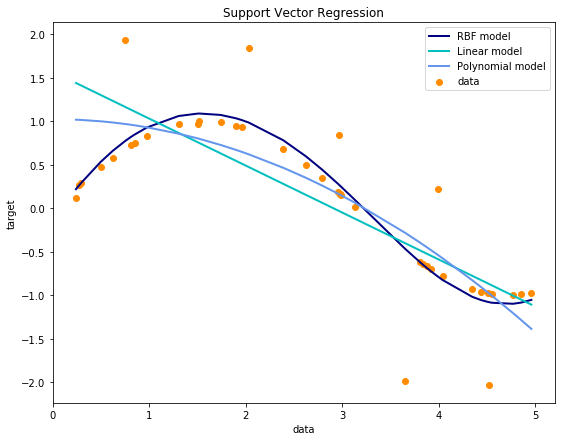

In [8]:
# Look at the results
plt.figure(figsize=(9,7))
lw = 2
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(X, y_rbf, color='navy', lw=lw, label='RBF model')
plt.plot(X, y_lin, color='c', lw=lw, label='Linear model')
plt.plot(X, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()

- **Sinusoid dataset**
    - 좀 더 복잡한 데이터에 대해서 fitting에 보도록 하겠습니다.

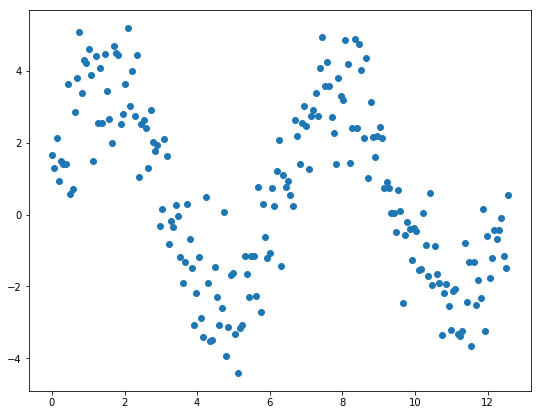

In [9]:
plt.figure(figsize=(9,7))
N = 200 # number of data points
x = np.linspace(0, 4*np.pi, N)
y = 3.0*np.sin(x+0.001) + 0.5 + np.random.randn(N) # create artificial data with noise
plt.scatter(x, y)

In [10]:
x[0:5]

array([0.        , 0.06314759, 0.12629518, 0.18944277, 0.25259036])

- input shape (1,) -> (1,1)

In [11]:
x=x.reshape(-1,1)
x[0:5]

array([[0.        ],
       [0.06314759],
       [0.12629518],
       [0.18944277],
       [0.25259036]])

In [12]:
# Fit regression model
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2, epsilon = 0.1)
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1, epsilon = 0.1)

y_lin = svr_lin.fit(x, y).predict(x)
y_poly = svr_poly.fit(x, y).predict(x)
y_rbf = svr_rbf.fit(x, y).predict(x)

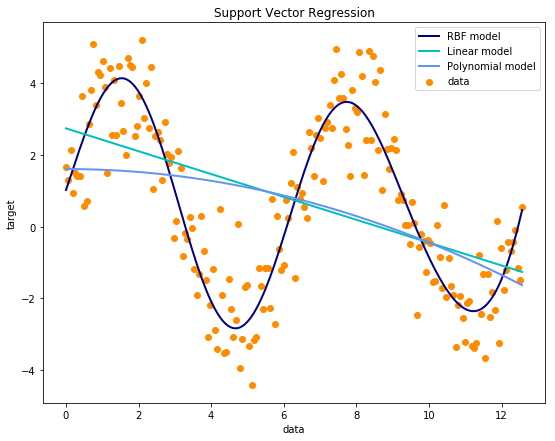

In [13]:
# Look at the results
plt.figure(figsize=(9,7))

lw = 2
plt.scatter(x, y, color='darkorange', label='data')
plt.plot(x, y_rbf, color='navy', lw=lw, label='RBF model')
plt.plot(x, y_lin, color='c', lw=lw, label='Linear model')
plt.plot(x, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')

plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()

# **SVR hyperparameters**

<p align="center"><img width="600" height="auto" src="../images/svr.png"></p>

**param1: $\varepsilon$**

$(-\varepsilon, + \varepsilon)$ 사이에 있는 error는 0으로 취급

**param2:** $C \rightarrow$ margin $\xi$

margin $\xi$에 penalty $C$가 곱해져 목적함수에 더 해짐

$$ \frac{1}{2} ||w||^{2} + C \sum_{i=1}^{l}(\xi_i + \xi_i^{*})$$

**param3: $\gamma$**$\rightarrow$ kernel function RBF

$$ k(x,x^{'}) = \frac{\exp(-{||x-x^{'}||}^2)}{\sigma} = \exp(-\gamma{||x-x^{'}||}^2)$$

- grid search

In [14]:
parameters = {'kernel':['rbf'] ,
              'C':np.logspace(-3,5,5),
              'gamma': np.logspace(-3,5,5),
              'epsilon':np.logspace(-3,5,10)}
parameters

{'C': array([1.e-03, 1.e-01, 1.e+01, 1.e+03, 1.e+05]),
 'epsilon': array([1.00000000e-03, 7.74263683e-03, 5.99484250e-02, 4.64158883e-01,
        3.59381366e+00, 2.78255940e+01, 2.15443469e+02, 1.66810054e+03,
        1.29154967e+04, 1.00000000e+05]),
 'gamma': array([1.e-03, 1.e-01, 1.e+01, 1.e+03, 1.e+05]),
 'kernel': ['rbf']}

In [15]:
svr = SVR() 
clf = GridSearchCV(estimator=svr, param_grid=parameters)

In [16]:
clf.fit(x,y)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ['rbf'], 'C': array([1.e-03, 1.e-01, 1.e+01, 1.e+03, 1.e+05]), 'epsilon': array([1.00000e-03, 7.74264e-03, 5.99484e-02, 4.64159e-01, 3.59381e+00,
       2.78256e+01, 2.15443e+02, 1.66810e+03, 1.29155e+04, 1.00000e+05]), 'gamma': array([1.e-03, 1.e-01, 1.e+01, 1.e+03, 1.e+05])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [17]:
clf.best_params_

{'C': 10.0, 'epsilon': 0.05994842503189409, 'gamma': 0.1, 'kernel': 'rbf'}

- best model

In [18]:
svr = SVR(kernel='rbf', 
          C=clf.best_params_['C'],
          epsilon=clf.best_params_['epsilon'], 
          gamma = clf.best_params_['gamma'])
svr.fit(x,y)

SVR(C=10.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.05994842503189409,
  gamma=0.1, kernel='rbf', max_iter=-1, shrinking=True, tol=0.001,
  verbose=False)

In [19]:
pred_y = svr.predict(x)

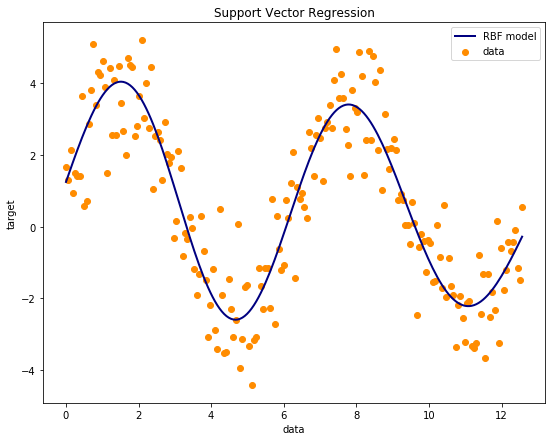

In [20]:
# Look at the results
plt.figure(figsize=(9,7))

lw = 2
plt.scatter(x, y, color='darkorange', label='data')
plt.plot(x, pred_y, color='navy', lw=lw, label='RBF model')

plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()

---